<blockquote>
<p>Example 1: <a href="https://leetcode.com/problems/shortest-path-in-binary-matrix/" target="_blank">1091. Shortest Path in Binary Matrix</a></p>
<p>Given an <code>n x n</code> binary matrix <code>grid</code>, return the length of the shortest clear path in the matrix. If there is no clear path, return <code>-1</code>. A clear path is a path from the top-left cell <code>(0, 0)</code> to the bottom-right cell <code>(n - 1, n - 1)</code> such that all visited cells are <code>0</code>. You may move 8-directionally (up, down, left, right, or diagonally).</p>
</blockquote>

In [1]:
from collections import deque
from typing import List

class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        breakpoint()
        if grid[0][0] == 1: # Base case
            return -1
        
        def valid(row, col):
            return 0 <= row < n and 0 <= col < n and grid[row][col] == 0  # Check for a viable node
        
        n = len(grid)
        seen = {(0,0)}
        queue = deque([(0, 0, 1)])
                
        #            |  →   |   ↓   |   ↘   |   ↖    |    ↗   |   ↙    |   ←    |    ↑  |
        directions = [(0, 1), (1, 0), (1, 1), (-1, -1), (-1, 1), (1, -1), (0, -1), (-1, 0)]

        while queue:
            row, col, steps = queue.popleft()
            if (row, col) == (n - 1, n - 1):
                return steps
            
            for dx, dy in directions:
                next_row, next_col = row + dy, col + dx
                if valid(next_row, next_col) and (next_row, next_col) not in seen:
                    seen.add((next_row, next_col))
                    queue.append((next_row, next_col, steps + 1))
                    
        return -1

In [ ]:
sol = Solution()
grid = [[0,1,1,0,0,0],
        [0,1,0,1,1,0],
        [0,1,1,0,1,0],
        [0,0,0,1,1,0],
        [1,1,1,1,1,0],
        [1,1,1,1,1,0]]
print(sol.shortestPathBinaryMatrix(grid))

<hr>
<blockquote>
<p>Example 2: <a href="https://leetcode.com/problems/all-nodes-distance-k-in-binary-tree/" target="_blank">863. All Nodes Distance K in Binary Tree</a></p>
<p>Given the <code>root</code> of a binary tree, a target node <code>target</code> in the tree, and an integer <code>k</code>, return an array of the values of all nodes that have a distance <code>k</code> from the target node.</p>
</blockquote>

<span style="color:red">Step 1:</span> <u>Change the Tree into an undirected graph</u>

<span style="color:red">Step 2:</span> <u>Run a `DFS` to find the target node</u>

<span style="color:red">Step 3:</span> <u>Run a `BFS` from the taget node `k` times</u>

In [3]:
from collections import deque
from typing import Optional
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        
    def __repr__(self):
        return f"Val = {self.val}"
        
def build_tree_from_list(values: List[Optional[int]]) -> Optional[TreeNode]:
    if not values or values[0] is None:
        return None
    root = TreeNode(values[0])
    queue = deque([root])
    i = 1
    while queue and i < len(values):
        node = queue.popleft()
        if i < len(values) and values[i] is not None:
            node.left = TreeNode(values[i])#type:ignore
            queue.append(node.left)
        i += 1
        if i < len(values) and values[i] is not None:
            node.right = TreeNode(values[i])#type:ignore
            queue.append(node.right)
        i += 1
    return root

def find_node_by_val(root: TreeNode, val: int) -> Optional[TreeNode]:
    if not root:
        return None
    if root.val == val:
        return root
    left = find_node_by_val(root.left, val)
    if left:
        return left
    return find_node_by_val(root.right, val)

In [4]:
from collections import deque

class Solution:
    def distanceK(self, root: TreeNode, target: TreeNode, k: int) -> List[int]:
        breakpoint()
        def dfs(node, parent):
            if not node:
                return 
            
            node.parent = parent    # assign the current node's parent-pointer to the parent
            dfs(node.left, node)    # Call on the children
            dfs(node.right, node)
        breakpoint()
        # Convert to an undirected graph    
        dfs(root, None)
        queue = deque([target])
        seen = {target}
        distance = 0
        
        # Running the DFS **k-times**
        while queue and distance < k:
            current_length = len(queue)
            for _ in range(current_length):
                # Get a node → Iterate over the children
                node = queue.popleft()
                for neighbor in [node.left, node.right, node.parent]:   # All nodes that have a connection to this one
                    if neighbor and neighbor not in seen:
                        seen.add(neighbor)
                        queue.append(neighbor)
                        
            distance += 1
            
        return [node.val for node in queue]

In [ ]:
sol = Solution()
root_values = [3,5,1,6,2,0,8,None,None,7,4]
tree_root = build_tree_from_list(root_values)
target_val, k = 5, 2
target_node = find_node_by_val(tree_root, target_val)
print(sol.distanceK(tree_root, target_node, k))  # Output: [7, 4, 1]

<hr>
<blockquote>
<p>Example 3: <a href="https://leetcode.com/problems/01-matrix/" target="_blank">542. 01 Matrix</a></p>
<p>Given an <code>m x n</code> binary (every element is <code>0</code> or <code>1</code>) matrix <code>mat</code>, find the distance of the nearest <code>0</code> for each cell. The distance between adjacent cells (horizontally or vertically) is <code>1</code>.</p>
<p>For example, given <code>mat = [[0,0,0],[0,1,0],[1,1,1]]</code>, return <code>[[0,0,0],[0,1,0],[1,2,1]]</code>.</p>
</blockquote>

In [6]:
from collections import deque

class Solution:
    def updateMatrix(self, mat: list[list[int]]) -> list[list[int]]:
        # Step 3: check if it is in-bounds
        def valid(row, col):
            return 0 <= row < m and 0 <= col < n and mat[row][col] == 1
        
        m = len(mat)     # num rows
        n = len(mat[0])  # num columns
        queue = deque()
        seen = set()
        
        # Step 1: Put All the 0's into the queue
        for row in range(m):
            for col in range(n):
                if mat[row][col] == 0:
                    queue.append((row, col, 1))     # Indicate that it is 1 step away
                    seen.add((row, col))
                    
        directions = [(0,1), (1,0), (0, -1), (-1, 0)]
        
        # Step 2: Run our BFS to indicate the depth from the nearest 0
        while queue:
            row, col, steps = queue.popleft()
            
            for dx, dy in directions:
                next_row, next_col = row + dy, col + dx
                if valid(next_row, next_col) and (next_row, next_col) not in seen:
                    seen.add((next_row, next_col))
                    # Step 4, increase the depth by 1 in the update matrix because it is once-again another step away from the nearest 0 if true
                    queue.append((next_row, next_col, steps + 1))
                    mat[next_row][next_col] = steps
                    
        return mat

<hr>
<blockquote>
<p>Example 4: <a href="https://leetcode.com/problems/shortest-path-in-a-grid-with-obstacles-elimination/" target="_blank">1293. Shortest Path in a Grid with Obstacles Elimination</a></p>
<p>You are given an <code>m x n</code> integer matrix <code>grid</code> where each cell is either <code>0</code> (empty) or <code>1</code> (obstacle). You can move up, down, left, or right from and to an empty cell in one step. Return the minimum number of steps to walk from the upper left corner to the lower right corner given that you can eliminate at most <code>k</code> obstacles. If it is not possible, return <code>-1</code>.</p>
</blockquote>

In [7]:
from collections import deque

class Solution:
    def shortestPath(self, grid: List[List[int]], k: int) -> int:
        # 1) Helper function
        def valid(row, col):
            return 0 <= row < m and 0 <= col < n
        breakpoint()
        # 2) Make the inits needed for the problem
        m = len(grid)
        n = len(grid[0])
        queue = deque([(0, 0, k, 0)])      # Initialize queue at position (0,0) with 'k' move remaining & 0-steps so far
        seen = {(0, 0, k)}
        directions = [(0,1), (1,0), (0, -1), (-1, 0)]
        
        # 3) Run the BFS
        while queue:
            row, col, remain, steps = queue.popleft()       
            if row == m - 1 and col == n - 1:                       
                return steps # If at the end, return the # of steps
            
            # 4) Otherwise, iterate over the neighbors
            for dx, dy in directions:                               
                next_row, next_col = row + dy, col + dx
                
                if valid(next_row, next_col):
                    if grid[next_row][next_col] == 0:               # 5) If the neighbor is NOT an obstacle → Do not need to use a remaining removal → add to queue
                        if (next_row, next_col, remain) not in seen:
                            seen.add((next_row, next_col, remain))
                            queue.append((next_row, next_col, remain, steps + 1))
                            
                    # 6) If the neighbor is an obstacle, we have remaining deletions, and it has not been visited
                    elif remain and (next_row, next_col, remain - 1) not in seen:
                        seen.add((next_row, next_col, remain -1))   # 7) Remove one of the remains
                        queue.append((next_row, next_col, remain - 1, steps + 1))
                            
        return -1

In [ ]:
grid = [[0,0,0],[1,1,0],[0,0,0],[0,1,1],[0,0,0]]
k = 1
sol = Solution()
output = sol.shortestPath(grid, k)
print(output)  # Expected: 6

<hr>
<blockquote>
<p>Example 5: <a href="https://leetcode.com/problems/shortest-path-with-alternating-colors/" target="_blank">1129. Shortest Path with Alternating Colors</a></p>
<p>You are given a directed graph with <code>n</code> nodes labeled from <code>0</code> to <code>n - 1</code>. Edges are red or blue in this graph. You are given <code>redEdges</code> and <code>blueEdges</code>, where <code>redEdges[i]</code> and <code>blueEdges[i]</code> both have the format <code>[x, y]</code> indicating an edge from <code>x</code> to <code>y</code> in the respective color. Return an array <code>ans</code> of length <code>n</code>, where <code>answer[i]</code> is the length of the shortest path from <code>0</code> to <code>i</code> where edge colors alternate, or <code>-1</code> if no path exists.</p>
</blockquote>

In [1]:
from collections import defaultdict, deque
from typing import List
class Solution:
    def shortestAlternatingPaths(self, n: int, redEdges: List[List[int]], blueEdges: List[List[int]]) -> List[int]:
        RED = 0
        BLUE = 1
        
        graph = defaultdict(lambda:defaultdict(list)) # 
        
        for x,y in redEdges:
            graph[RED][x].append(y)
        for x,y in blueEdges:
            graph[BLUE][x].append(y)
            
        ans = [float("inf")] * n
        queue = deque([(0, RED, 0), (0, BLUE, 0)])
        seen = {(0, RED), (0, BLUE)}
        
        
        while queue:
            node, color, steps = queue.popleft()
            ans[node] = min(ans[node], steps)
            
            for neighbor in graph[color][node]:
                if (neighbor, 1 - color) not in seen:
                    seen.add((neighbor, 1 - color))
                    queue.append((neighbor, 1 - color, steps + 1))
                    
        return [x if x != float("inf") else -1 for x in ans]

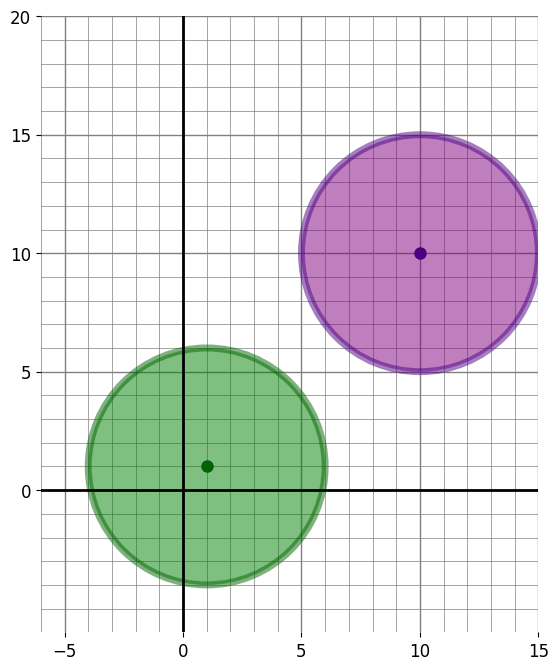

In [25]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(16,8), dpi=100)
ax.set_xlim(-6, 15)
ax.set_ylim(-6, 20)
ax.set_aspect('equal', 'box')

# major every 5, minor every 1
ax.set_xticks(np.arange(-5, 16, 5))
ax.set_yticks(np.arange( 0, 21, 5))
ax.set_xticks(np.arange(-6, 16, 1), minor=True)
ax.set_yticks(np.arange(-6, 21, 1), minor=True)

ax.set_axisbelow(True)
ax.grid(which='major', color='gray', linewidth=1)
ax.grid(which='minor', color='gray', linewidth=0.5)

ax.axhline(0, color='black', linewidth=2)
ax.axvline(0, color='black', linewidth=2)

# hide minor‑tick markers, keep only labels at majors
ax.tick_params(which='minor', length=0)
ax.tick_params(which='major', labelsize=12)

for spine in ax.spines.values():
    spine.set_visible(False)
    
    

from matplotlib.patches import Circle
b1 = Circle((1,1), radius = 5, edgecolor='darkgreen', facecolor='green', alpha=0.5, linewidth=5)
b2 = Circle((10,10), radius = 5, edgecolor='indigo', facecolor='purple', alpha=0.5, linewidth=5)
ax.add_patch(b1)
ax.add_patch(b2)
ax.plot(1, 1, marker='o', markersize=8, color='darkgreen',zorder=2)
ax.plot(10, 10, marker='o', markersize=8, color='indigo',zorder=2)
plt.show()
